# Module import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics # 모델평가시 이용
pd.set_option('display.max_columns', 50)

In [2]:
# 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# - 부호
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# [시각화] 데이터 내보내기

In [4]:
X_vis = pd.read_csv('./5조(개인) 최종 데이터.csv',encoding='CP949') ; X_vis

,날짜,요일,주말여부,주문수,코로나발발,공휴일,복날,방학여부,평균기온,최저기온,최고기온,강우여부,강수량mm,지하철승하차인원,버스승하차인원,도마1동인구,도마2동인구,변동인구,영업가게,확진자,완치자,사망자,전국확진자,전국완치자,전국사망자,구글검색량,네이버검색량,유튜브조회수
0,2015-11-08,일,1,64,0,0,0,0,13.9,13.4,14.5,1,15.5,80547.0,195785.0,17755,20916,18026,45,0,0,0,0,0,0,26.0,13.249780,0.0
1,2015-11-09,월,0,31,0,0,0,0,13.1,11.5,15.2,1,1.7,123733.0,359972.0,17753,20913,18025,45,0,0,0,0,0,0,NaN,6.657635,0.0
2,2015-11-10,화,0,19,0,0,0,0,11.0,8.0,14.5,0,NaN,128041.0,363298.0,17751,20910,18024,45,0,0,0,0,0,0,NaN,8.931460,0.0
3,2015-11-11,수,0,28,0,0,0,0,11.9,6.8,18.3,0,NaN,128533.0,368368.0,17749,20907,18023,45,0,0,0,0,0,0,NaN,9.810341,0.0
4,2015-11-12,목,0,24,0,0,0,0,13.6,8.8,19.4,0,NaN,128126.0,364174.0,17747,20904,18022,45,0,0,0,0,0,0,NaN,10.475920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2020-09-22,화,0,60,1,0,0,0,19.1,14.9,24.5,0,NaN,79522.0,NaN,15141,18363,16412,31,2,0,0,70,2,90,NaN,13.005230,0.0
1693,2020-09-23,수,0,54,1,0,0,0,19.0,14.4,23.6,0,NaN,80701.0,NaN,15142,18358,16412,31,0,7,0,61,3,193,NaN,13.216580,0.0
1694,2020-09-24,목,0,57,1,0,0,0,20.8,15.7,26.4,0,NaN,83052.0,NaN,15143,18352,16413,31,0,4,0,110,0,209,NaN,13.809880,0.0
1695,2020-09-25,금,0,77,1,0,0,0,20.0,14.8,25.9,0,NaN,88379.0,NaN,15145,18347,16414,31,1,7,0,125,5,182,NaN,17.885910,0.0


In [5]:
X_vis.drop(columns=['복날','주문수','최저기온','최고기온','버스승하차인원','구글검색량'],inplace=True)

In [6]:
X_vis['강수량mm'] = X_vis['강수량mm'].fillna(0)
X_vis['강수량mm'] = np.log1p(X_vis['강수량mm'])

In [7]:
X_vis['유튜브조회수'] = np.log1p(X_vis['유튜브조회수'])

In [8]:
X_vis['인구']= X_vis['도마1동인구']+X_vis['도마2동인구']+X_vis['변동인구']

In [9]:
X_vis.drop(columns=['도마1동인구','도마2동인구','변동인구'],inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_vis

,날짜,요일,주말여부,코로나발발,공휴일,방학여부,평균기온,강우여부,강수량mm,지하철승하차인원,영업가게,확진자,완치자,사망자,전국확진자,전국완치자,전국사망자,네이버검색량,유튜브조회수,인구
0,2015-11-08,일,1,0,0,0,13.9,1,2.803360,80547.0,45,0,0,0,0,0,0,13.249780,0.0,56697
1,2015-11-09,월,0,0,0,0,13.1,1,0.993252,123733.0,45,0,0,0,0,0,0,6.657635,0.0,56691
2,2015-11-10,화,0,0,0,0,11.0,0,0.000000,128041.0,45,0,0,0,0,0,0,8.931460,0.0,56685
3,2015-11-11,수,0,0,0,0,11.9,0,0.000000,128533.0,45,0,0,0,0,0,0,9.810341,0.0,56679
4,2015-11-12,목,0,0,0,0,13.6,0,0.000000,128126.0,45,0,0,0,0,0,0,10.475920,0.0,56673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2020-09-22,화,0,1,0,0,19.1,0,0.000000,79522.0,31,2,0,0,70,2,90,13.005230,0.0,49916
1693,2020-09-23,수,0,1,0,0,19.0,0,0.000000,80701.0,31,0,7,0,61,3,193,13.216580,0.0,49912
1694,2020-09-24,목,0,1,0,0,20.8,0,0.000000,83052.0,31,0,4,0,110,0,209,13.809880,0.0,49908
1695,2020-09-25,금,0,1,0,0,20.0,0,0.000000,88379.0,31,1,7,0,125,5,182,17.885910,0.0,49906


In [12]:
trans_col = ['영업가게','인구']

In [13]:
X_vis.loc[:,trans_col] = scaler.fit_transform(X_vis.loc[:,trans_col])

<AxesSubplot:xlabel='영업가게', ylabel='인구'>

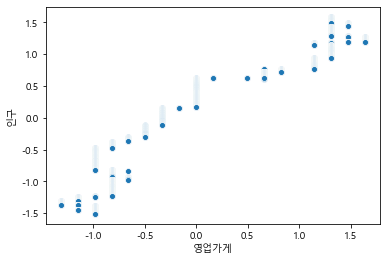

In [14]:
# 따악 봐도.. 인구 영향이 있네
sns.scatterplot(X_vis.loc[:,'영업가게'],X_vis.loc[:,'인구']) 

# 데이터 전처리

## 변수생성

In [15]:
X = pd.read_csv('./5조(개인) 최종 데이터.csv',encoding='CP949') ; X
X_ = X.copy() ; X

,날짜,요일,주말여부,주문수,코로나발발,공휴일,복날,방학여부,평균기온,최저기온,최고기온,강우여부,강수량mm,지하철승하차인원,버스승하차인원,도마1동인구,도마2동인구,변동인구,영업가게,확진자,완치자,사망자,전국확진자,전국완치자,전국사망자,구글검색량,네이버검색량,유튜브조회수
0,2015-11-08,일,1,64,0,0,0,0,13.9,13.4,14.5,1,15.5,80547.0,195785.0,17755,20916,18026,45,0,0,0,0,0,0,26.0,13.249780,0.0
1,2015-11-09,월,0,31,0,0,0,0,13.1,11.5,15.2,1,1.7,123733.0,359972.0,17753,20913,18025,45,0,0,0,0,0,0,NaN,6.657635,0.0
2,2015-11-10,화,0,19,0,0,0,0,11.0,8.0,14.5,0,NaN,128041.0,363298.0,17751,20910,18024,45,0,0,0,0,0,0,NaN,8.931460,0.0
3,2015-11-11,수,0,28,0,0,0,0,11.9,6.8,18.3,0,NaN,128533.0,368368.0,17749,20907,18023,45,0,0,0,0,0,0,NaN,9.810341,0.0
4,2015-11-12,목,0,24,0,0,0,0,13.6,8.8,19.4,0,NaN,128126.0,364174.0,17747,20904,18022,45,0,0,0,0,0,0,NaN,10.475920,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2020-09-22,화,0,60,1,0,0,0,19.1,14.9,24.5,0,NaN,79522.0,NaN,15141,18363,16412,31,2,0,0,70,2,90,NaN,13.005230,0.0
1693,2020-09-23,수,0,54,1,0,0,0,19.0,14.4,23.6,0,NaN,80701.0,NaN,15142,18358,16412,31,0,7,0,61,3,193,NaN,13.216580,0.0
1694,2020-09-24,목,0,57,1,0,0,0,20.8,15.7,26.4,0,NaN,83052.0,NaN,15143,18352,16413,31,0,4,0,110,0,209,NaN,13.809880,0.0
1695,2020-09-25,금,0,77,1,0,0,0,20.0,14.8,25.9,0,NaN,88379.0,NaN,15145,18347,16414,31,1,7,0,125,5,182,NaN,17.885910,0.0


In [16]:
# 월변수 만들기
X['월'] =  X['날짜'].str[5:7]
# 월 , 요일 변수 one hot vector 로 바꾸기
# 처음 달의 값을 drop 시켜야, 선형회귀를 적용시 다중공산성 문제에서 자유롭다.
X = pd.get_dummies(X, columns=['요일','월'],drop_first= True) 

In [17]:
y_pd = X[['주문수']]

In [18]:
# 영어로 해주어야해...
y_pd.columns = ['order']

In [19]:
# y 변수 추출
y = np.array(X['주문수'])

## 변수 제거

In [20]:
# 필요없는 변수 dropping
# 왜 drop 했느냐? 
# 너무 sparse 한 변수여서 정보가 없다. : 복날(1년에 한번)
# 데이터를 이용할 수 있는 형식이 아니다 : 날짜
# 의미가 겹치고 있다. : 최저기온(평균기온), 최고기온(평균기온), 주말여부(요일),강우여부(0 도 사실 안온거라고 치자.) 
# 필요 없는 데이터이다. : 코로나발발,확진자(얘는 코로나 종식되면 무의미해짐) , 구글검색량(NA 채우고 버려지는 변수) , '버스승하차인원(NA 채우고 버려짐)'
# 다중공산성 : 코로나발발(유동성)
X.drop(columns=['날짜','주문수','최저기온','주말여부','버스승하차인원',
                '최고기온','확진자','사망자','완치자','전국확진자','전국완치자','전국사망자','구글검색량'],inplace=True)

In [21]:
X

,코로나발발,공휴일,복날,방학여부,평균기온,강우여부,강수량mm,지하철승하차인원,도마1동인구,도마2동인구,변동인구,영업가게,네이버검색량,유튜브조회수,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,월_02,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,0,0,0,0,13.9,1,15.5,80547.0,17755,20916,18026,45,13.249780,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,13.1,1,1.7,123733.0,17753,20913,18025,45,6.657635,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,11.0,0,NaN,128041.0,17751,20910,18024,45,8.931460,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,11.9,0,NaN,128533.0,17749,20907,18023,45,9.810341,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,13.6,0,NaN,128126.0,17747,20904,18022,45,10.475920,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1,0,0,0,19.1,0,NaN,79522.0,15141,18363,16412,31,13.005230,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1693,1,0,0,0,19.0,0,NaN,80701.0,15142,18358,16412,31,13.216580,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1694,1,0,0,0,20.8,0,NaN,83052.0,15143,18352,16413,31,13.809880,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1695,1,0,0,0,20.0,0,NaN,88379.0,15145,18347,16414,31,17.885910,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 강수량 Imputation 밎 인구통합

### 강수량 더미화

In [22]:
X.loc[((X.loc[:,'강수량mm'] >= 0) & (1 >= X.loc[:,'강수량mm'] )),'강수'] = 1

In [23]:
X.loc[((X.loc[:,'강수량mm'] > 1) & (5 >= X.loc[:,'강수량mm'] )),'강수'] = 2

In [24]:
X.loc[((X.loc[:,'강수량mm'] > 5)),'강수'] = 3

In [25]:
X['강수']= X['강수'].fillna(0)# 강수량 Imputation 

In [26]:
# 강수량 Imputation 
X['강수량mm'] = X['강수량mm'].fillna(0)

In [27]:
X = pd.get_dummies(X, columns=['강수'],drop_first= True) 

In [28]:
X

,코로나발발,공휴일,복날,방학여부,평균기온,강우여부,강수량mm,지하철승하차인원,도마1동인구,도마2동인구,변동인구,영업가게,네이버검색량,유튜브조회수,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,월_02,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12,강수_1.0,강수_2.0,강수_3.0
0,0,0,0,0,13.9,1,15.5,80547.0,17755,20916,18026,45,13.249780,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,13.1,1,1.7,123733.0,17753,20913,18025,45,6.657635,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,11.0,0,0.0,128041.0,17751,20910,18024,45,8.931460,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,11.9,0,0.0,128533.0,17749,20907,18023,45,9.810341,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,13.6,0,0.0,128126.0,17747,20904,18022,45,10.475920,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1,0,0,0,19.1,0,0.0,79522.0,15141,18363,16412,31,13.005230,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1693,1,0,0,0,19.0,0,0.0,80701.0,15142,18358,16412,31,13.216580,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1694,1,0,0,0,20.8,0,0.0,83052.0,15143,18352,16413,31,13.809880,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1695,1,0,0,0,20.0,0,0.0,88379.0,15145,18347,16414,31,17.885910,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
X_rainy = X.loc[X['강수량mm']!=0,['강수량mm']] ; X_rainy

,강수량mm
0,15.5
1,1.7
5,30.7
6,3.7
8,26.3
...,...
1681,3.0
1682,11.7
1685,0.1
1686,4.8


<AxesSubplot:>

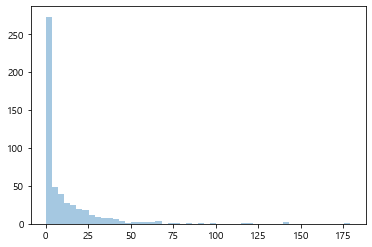

In [30]:
sns.distplot(X_rainy,kde=False)

In [31]:
# 강수량 변환
X_rainy_log = np.log1p(X_rainy)

In [32]:
# 강수량 Imputation 
X['강수량mm'] = X['강수량mm'].fillna(0)
# 강수량 변환

<AxesSubplot:>

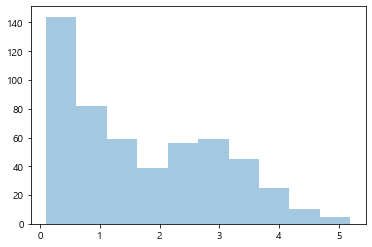

In [33]:
sns.distplot(X_rainy_log,kde=False)
# 뭐... 이정도면 안정화가 된것 아닐까?

In [34]:
X['강수량mm'] = np.log1p(X['강수량mm'])

## 유튜브 조회수 scaling

In [35]:
X_you = X.loc[X['유튜브조회수']!=0,['유튜브조회수']] ; X_you

,유튜브조회수
157,1.154641e+06
158,3.537544e+05
159,1.855865e+05
160,1.221199e+05
161,8.926114e+04
...,...
1672,1.214592e+04
1673,1.152304e+04
1674,1.095013e+04
1675,1.042169e+04


<AxesSubplot:>

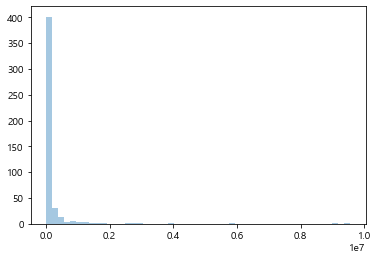

In [36]:
sns.distplot(X_you,kde=False)

In [37]:
# 강수량 변환
X_you_log = np.log1p(X_you)

<AxesSubplot:>

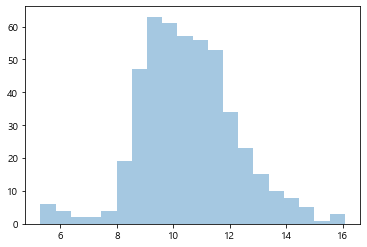

In [38]:
sns.distplot(X_you_log,kde=False)
# 뭐... 이정도면 안정화가 된것 아닐까?

In [39]:
X['유튜브조회수'] = np.log1p(X['유튜브조회수'])

## 인구 통합

In [40]:
# 인구 변수 통합
X['인구']= X['도마1동인구']+X['도마2동인구']+X['변동인구']

In [41]:
X.drop(columns=['도마1동인구','도마2동인구','변동인구'],inplace = True)

In [42]:
X = X.astype(float)

In [43]:
X.describe()

,코로나발발,공휴일,복날,방학여부,평균기온,강우여부,강수량mm,지하철승하차인원,영업가게,네이버검색량,유튜브조회수,요일_목,요일_수,요일_월,요일_일,요일_토,요일_화,월_02,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12,강수_1.0,강수_2.0,강수_3.0,인구
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,0.146140,0.050088,0.008839,0.389511,13.840837,0.308780,0.527349,103214.923394,37.004714,14.583172,2.933014,0.147908,0.126105,0.132587,0.146140,0.147908,0.149087,0.082499,0.087802,0.085445,0.088391,0.084856,0.083677,0.086623,0.081320,0.067767,0.080141,0.087802,0.192693,0.080141,0.134944,53212.527991
std,0.353351,0.218192,0.093628,0.487783,10.143406,0.462126,1.058985,25471.031974,6.093317,4.370889,4.806402,0.355113,0.332065,0.339228,0.353351,0.355113,0.356279,0.275204,0.283090,0.279625,0.283947,0.278749,0.276985,0.281365,0.273406,0.251419,0.271592,0.283090,0.394530,0.271592,0.341764,2187.034515
min,0.000000,0.000000,0.000000,0.000000,-11.800000,0.000000,0.000000,18017.000000,29.000000,5.676944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49902.000000
25%,0.000000,0.000000,0.000000,0.000000,5.100000,0.000000,0.000000,81280.000000,31.000000,11.499420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51064.000000
50%,0.000000,0.000000,0.000000,0.000000,14.400000,0.000000,0.000000,115104.000000,35.000000,14.039930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53520.000000
75%,0.000000,0.000000,0.000000,1.000000,22.600000,1.000000,0.405465,122304.000000,44.000000,17.166030,8.741010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55224.000000
max,1.000000,1.000000,1.000000,1.000000,33.400000,1.000000,5.193512,146659.000000,47.000000,40.000000,16.073103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56697.000000


In [44]:
# columns 의 명칭바꾸기. (한글로 하면 에러가 나온다.)
X.columns =  ['corona','holyday','bok','vacation','temp','rain_ox','rain','subway','store',
                  'naver','youtube','thu','wed','mon','sun','sat','tue'
                  ,'mon2','mon3','mon4','mon5','mon6','mon7','mon8','mon9','mon10','mon11','mon12','rain1','rain2','rain3','pop']

In [45]:
X

,corona,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12,rain1,rain2,rain3,pop
0,0.0,0.0,0.0,0.0,13.9,1.0,2.803360,80547.0,45.0,13.249780,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,56697.0
1,0.0,0.0,0.0,0.0,13.1,1.0,0.993252,123733.0,45.0,6.657635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,56691.0
2,0.0,0.0,0.0,0.0,11.0,0.0,0.000000,128041.0,45.0,8.931460,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56685.0
3,0.0,0.0,0.0,0.0,11.9,0.0,0.000000,128533.0,45.0,9.810341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56679.0
4,0.0,0.0,0.0,0.0,13.6,0.0,0.000000,128126.0,45.0,10.475920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,56673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1.0,0.0,0.0,0.0,19.1,0.0,0.000000,79522.0,31.0,13.005230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49916.0
1693,1.0,0.0,0.0,0.0,19.0,0.0,0.000000,80701.0,31.0,13.216580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49912.0
1694,1.0,0.0,0.0,0.0,20.8,0.0,0.000000,83052.0,31.0,13.809880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49908.0
1695,1.0,0.0,0.0,0.0,20.0,0.0,0.000000,88379.0,31.0,17.885910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,49906.0


## 인구수 제거

<AxesSubplot:>

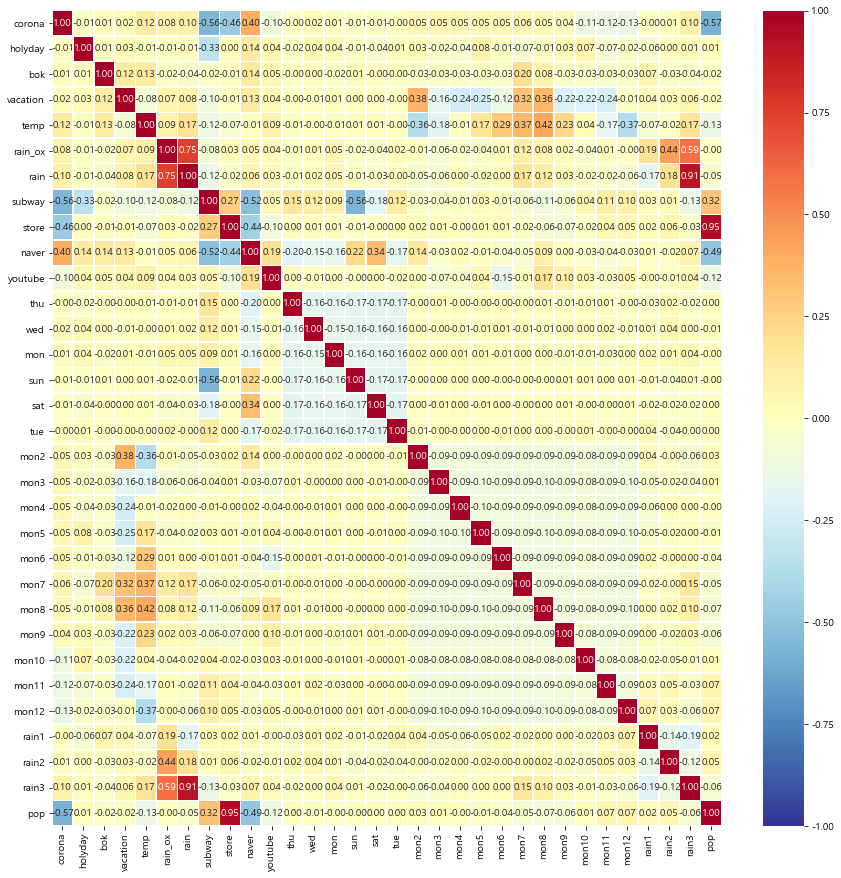

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',vmin=-1,vmax=1)
# 아니 이렇게까지 대단하게 인구가 겹치고 있다. -> 제거

In [47]:
X.drop(columns=['pop'],inplace=True) 

In [48]:
X

,corona,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12,rain1,rain2,rain3
0,0.0,0.0,0.0,0.0,13.9,1.0,2.803360,80547.0,45.0,13.249780,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,13.1,1.0,0.993252,123733.0,45.0,6.657635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,11.0,0.0,0.000000,128041.0,45.0,8.931460,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,11.9,0.0,0.000000,128533.0,45.0,9.810341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,13.6,0.0,0.000000,128126.0,45.0,10.475920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1.0,0.0,0.0,0.0,19.1,0.0,0.000000,79522.0,31.0,13.005230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1693,1.0,0.0,0.0,0.0,19.0,0.0,0.000000,80701.0,31.0,13.216580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1694,1.0,0.0,0.0,0.0,20.8,0.0,0.000000,83052.0,31.0,13.809880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,1.0,0.0,0.0,0.0,20.0,0.0,0.000000,88379.0,31.0,17.885910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

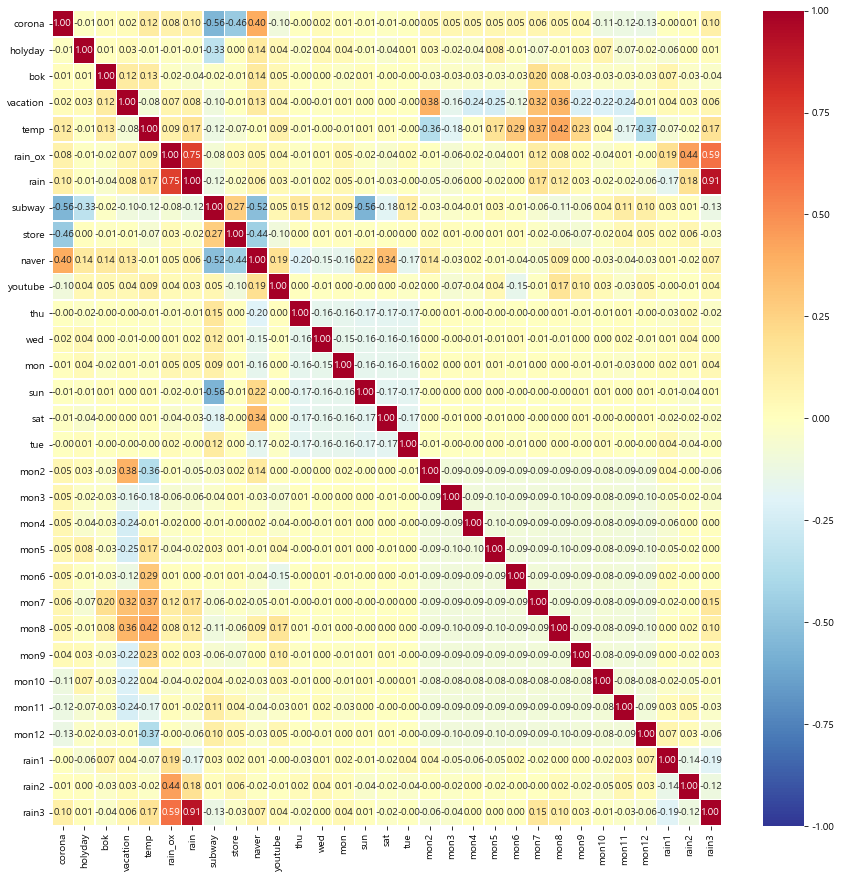

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',vmin=-1,vmax=1)

## [ 중간 ] R 을 이용해야 되서 , 내보내자

In [50]:
# statmodel 같은 쓰레기 패키지는 애초에 뭘 지원 안한다.
# R 이 통계에서는 역시 좋은거같기두...
# 어 짜 피 Linear regression 할 꺼니까 Python 에서는 머신러닝 돌려본거로 퉁치는게 나을거같다.
# X 랑 y 붙여가지구, 밖으로 내보내자~
R_data = pd.concat([X,y_pd],axis=1) ; R_data

,corona,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12,rain1,rain2,rain3,order
0,0.0,0.0,0.0,0.0,13.9,1.0,2.803360,80547.0,45.0,13.249780,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,64
1,0.0,0.0,0.0,0.0,13.1,1.0,0.993252,123733.0,45.0,6.657635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31
2,0.0,0.0,0.0,0.0,11.0,0.0,0.000000,128041.0,45.0,8.931460,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19
3,0.0,0.0,0.0,0.0,11.9,0.0,0.000000,128533.0,45.0,9.810341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28
4,0.0,0.0,0.0,0.0,13.6,0.0,0.000000,128126.0,45.0,10.475920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,1.0,0.0,0.0,0.0,19.1,0.0,0.000000,79522.0,31.0,13.005230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60
1693,1.0,0.0,0.0,0.0,19.0,0.0,0.000000,80701.0,31.0,13.216580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
1694,1.0,0.0,0.0,0.0,20.8,0.0,0.000000,83052.0,31.0,13.809880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57
1695,1.0,0.0,0.0,0.0,20.0,0.0,0.000000,88379.0,31.0,17.885910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77


In [51]:
# 아 이때 마지막 주문수를 보니까 이상하다.
# 이는 저희가 저 데이터를 수집할때에(학기초), 막 모은 데이터의 마지막 날이라 제대로 정산이 안된것으로 판단된다.
# 그러므로 저 ROW 는 제외하자.
R_data.drop(R_data.tail(1).index,inplace=True) 

In [52]:
R_data

,corona,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12,rain1,rain2,rain3,order
0,0.0,0.0,0.0,0.0,13.9,1.0,2.803360,80547.0,45.0,13.249780,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,64
1,0.0,0.0,0.0,0.0,13.1,1.0,0.993252,123733.0,45.0,6.657635,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31
2,0.0,0.0,0.0,0.0,11.0,0.0,0.000000,128041.0,45.0,8.931460,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19
3,0.0,0.0,0.0,0.0,11.9,0.0,0.000000,128533.0,45.0,9.810341,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28
4,0.0,0.0,0.0,0.0,13.6,0.0,0.000000,128126.0,45.0,10.475920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,1.0,0.0,0.0,0.0,18.0,0.0,0.000000,79670.0,31.0,13.387190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,67
1692,1.0,0.0,0.0,0.0,19.1,0.0,0.000000,79522.0,31.0,13.005230,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60
1693,1.0,0.0,0.0,0.0,19.0,0.0,0.000000,80701.0,31.0,13.216580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
1694,1.0,0.0,0.0,0.0,20.8,0.0,0.000000,83052.0,31.0,13.809880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


<AxesSubplot:xlabel='temp'>

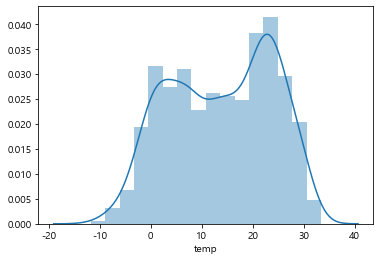

In [53]:
# 잠깐만 강수량! 이 경우에는 
X['temp'] 
sns.distplot(X['temp'],kde=True)

In [54]:
R_data.to_csv('R.csv',index=False)

## 최종적으로 뺄거 다 빼기

In [55]:
X.drop(columns=['rain1','rain2','rain3','corona'],inplace=True)

## 온도 그래프 그리기

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

<AxesSubplot:>

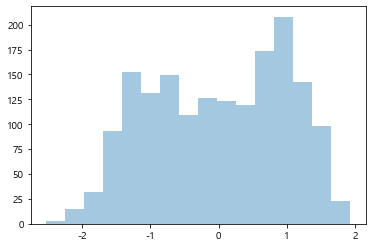

In [63]:
sns.distplot(scaler.fit_transform(X[['temp']]),kde=False)

<AxesSubplot:>

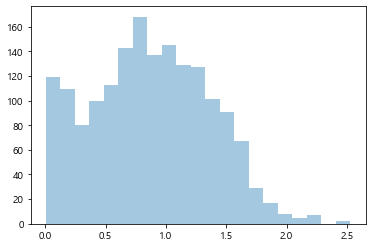

In [64]:
sns.distplot(np.abs(scaler.fit_transform(X[['temp']])),kde=False)

## Scaling 

In [56]:
# train set 에 scaling 을 fitting 한 이후, train 에서와 같은 변환을 test 에도 해주어야한다.
# 하.. 지 만! 그냥 하자.

In [57]:
# dataset train/test set 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [58]:
X_train

,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
801,0.0,0.0,0.0,1.1,0.0,0.000000,121764.0,37.0,10.495550,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,22.2,1.0,2.388763,70529.0,31.0,16.964600,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,0.0,0.0,0.0,23.4,0.0,0.000000,122510.0,32.0,12.348090,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,0.0,0.0,0.0,17.2,0.0,0.000000,101007.0,32.0,22.782000,14.015344,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,6.9,0.0,0.000000,126633.0,45.0,7.321376,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,0.0,16.2,1.0,0.262364,121938.0,37.0,8.662820,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,0.0,0.0,0.0,17.9,1.0,2.734368,112990.0,32.0,15.084530,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,1.0,28.5,1.0,0.470004,91924.0,31.0,22.654320,11.094073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,21.4,0.0,0.000000,82487.0,41.0,16.055380,8.657107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
trans_col = ['temp','subway','store','naver','youtube']

In [60]:
# standard transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
# train set 에 scaling 을 fitting 한 이후, train 에서와 같은 변환을 test 에도 해주어야한다.
# 하.. 지 만! 그
trans_col = ['temp','subway','store','naver','youtube']
scaler.fit(X_train.loc[:,trans_col])
X_train.loc[:,trans_col] = scaler.transform(X_train.loc[:,trans_col])
X_test.loc[:,trans_col] = scaler.transform(X_test.loc[:,trans_col])
# 아래는 WARNING만 주는거라 걱정안해도 된다.(자세한건 SettingWithCopyWarning 검색)

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._

## Correlation plot

In [62]:
X_cor = X[['temp','rain','subway','store','naver']]

<AxesSubplot:>

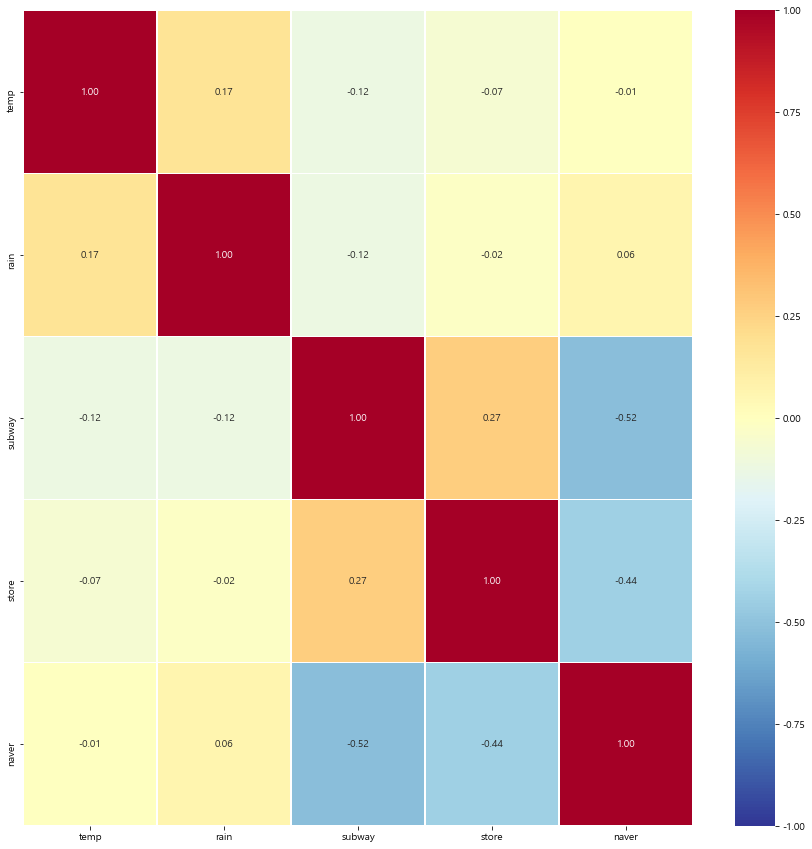

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(data = X_cor.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',vmin=-1,vmax=1)

In [64]:
X_train

,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
801,0.0,0.0,0.0,-1.232665,0.0,0.000000,0.730786,-0.001459,-0.945333,-0.604577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.846370,1.0,2.388763,-1.300334,-0.991678,0.560653,-0.604577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1223,0.0,0.0,0.0,0.964609,0.0,0.000000,0.760360,-0.826642,-0.514064,-0.604577,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,0.0,0.0,0.0,0.353708,0.0,0.000000,-0.092088,-0.826642,1.914935,2.325134,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,-0.661177,0.0,0.000000,0.923809,1.318832,-1.684276,-0.604577,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,0.0,0.0,0.255175,1.0,0.262364,0.737684,-0.001459,-1.371990,-0.604577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1216,0.0,0.0,0.0,0.422680,1.0,2.734368,0.382956,-0.826642,0.122975,-0.604577,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,0.0,0.0,1.0,1.467124,1.0,0.470004,-0.452168,-0.991678,1.885211,1.714483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.767544,0.0,0.000000,-0.826281,0.658686,0.348988,1.205070,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X_test

,holyday,bok,vacation,temp,rain_ox,rain,subway,store,naver,youtube,thu,wed,mon,sun,sat,tue,mon2,mon3,mon4,mon5,mon6,mon7,mon8,mon9,mon10,mon11,mon12
1018,0.0,0.0,0.0,-0.542938,0.0,0.000000,0.804482,-0.991678,-0.197593,-0.604577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,-0.010863,1.0,1.547563,-0.594408,1.318832,0.964681,-0.604577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107,0.0,0.0,1.0,-1.508556,0.0,0.000000,0.891301,1.318832,-0.165050,-0.604577,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,-0.621764,0.0,0.000000,-0.438927,1.318832,0.013361,-0.604577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1686,0.0,0.0,0.0,0.787250,1.0,1.757858,-1.197658,-0.991678,0.126050,-0.604577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.0,0.0,0.0,0.540919,0.0,0.000000,0.767456,1.318832,-1.353540,-0.604577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
578,0.0,0.0,0.0,1.151821,0.0,0.000000,-1.328877,0.658686,0.961171,-0.604577,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.0,0.0,0.0,-0.030569,1.0,2.797281,0.539904,1.648905,-0.489976,1.483652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1635,0.0,1.0,1.0,1.023728,1.0,0.336472,-2.511870,-1.156714,1.425753,0.755843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# na 값은 없다.
X_test.isnull().sum().sum()

0

In [67]:
# 예측값 저장 dictionary
Data = { 'y_test' : y_test }

In [68]:
# 평가값 저장 dictionary
score = {}

# 모델 비교

## Multi Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))
score['linear'] =  [metrics.mean_squared_error(y_test,y_pred), model.score(X_test, y_test)]
Data['linear'] = y_pred 

MSE : 105.47097898700119
R squared : 0.5519415809711871


Text(0.5, 1.0, 'Coefficients in the Model')

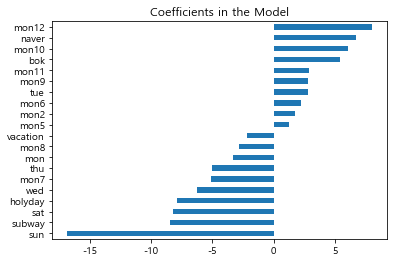

In [71]:
coef = pd.Series(model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

## Ridge regression

$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right) $

In [72]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

para_range = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
model = RidgeCV(alphas = para_range , cv=5)
# cross validaaion 을 5 fold cross validation 으로 지정 , 
# para_range 의 범위만큼 ,cv 를 해서 최적의 alpha를 구하려하였다.
model.fit(X_train, y_train) ;

In [73]:
from sklearn import metrics

predicted = model.predict(X_test) 
# 우리가 fitting 한 coefficient 로 X_test 를 이용해 Y_test 를 predict
#ridgecv.alpha_ # Estimated regularization parametor (최적값)

print('best_alpha :',model.alpha_) 
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',model.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

best_alpha : 1.151395399326447
MSE : 105.30544460131779
R_squared : 0.55264479882179


In [74]:
# 데이터 저장
score['Ridge'] =  [metrics.mean_squared_error(y_test, predicted),model.score(X_test, y_test)]
Data['Ridge'] = y_pred 

Text(0.5, 1.0, 'Coefficients in the Model')

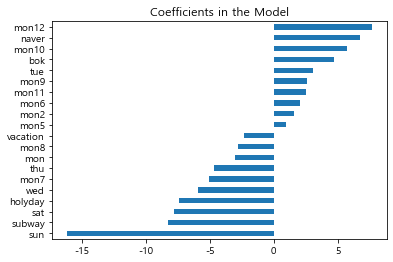

In [75]:
# 변수의 계수 시각화
coef = pd.Series(model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

## lasso regression

$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M | w_j | \right)$

In [76]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
lassocv = LassoCV(alphas = alphas, cv=5)
# 위 ridge 때와 동일
lassocv.fit(X_train, y_train) ;

In [77]:
from sklearn import metrics
predicted = lassocv.predict(X_test) 
#lassocv.alpha_ # Estimated regularization parametor (최적값)
print('best_alpha :',lassocv.alpha_) 
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',lassocv.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

best_alpha : 0.009540954763499945
MSE : 105.60781887921202
R_squared : 0.5513602621444071


In [78]:
score['lasso'] = [metrics.mean_squared_error(y_test, predicted), model.score(X_test, y_test)]
Data['lasso'] = y_pred 

Text(0.5, 1.0, 'Coefficients in the Model')

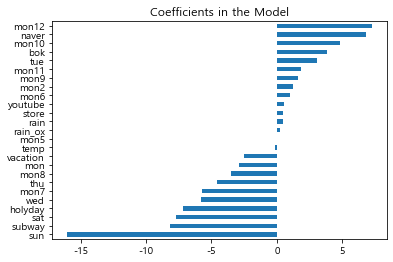

In [79]:
# 계수 시각화
coef = pd.Series(lassocv.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(15)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

## K-Neighbors Regression

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor() 
param_grid ={'n_neighbors' : np.arange(1,10)}
model = GridSearchCV(model,param_grid,cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [81]:
y_pred = model.predict(X_test)
print('best N :' ,model.best_params_)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("R squared :", metrics.r2_score(y_test, y_pred))

best N : {'n_neighbors': 9}
MSE : 104.5967320261438
R squared : 0.5556555287782969


In [82]:
score['K-NN'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['K-NN'] = y_pred 

## RandomForest Regressoion

In [83]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 91.52979176470588
R_squared : 0.6111660839216733


In [85]:
score['random_forest'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['random_forest'] = y_pred 

<AxesSubplot:>

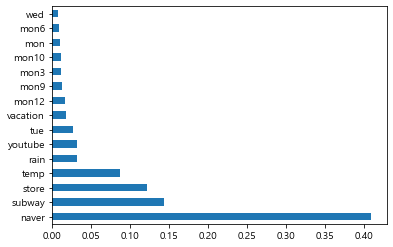

In [86]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Gradient Boosting resgressoion

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [88]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 88.94304819816408
R_squared : 0.6221550047033844


In [89]:
score['Gradient_boosting'] = [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['Gradient_boosting'] = y_pred 

<AxesSubplot:>

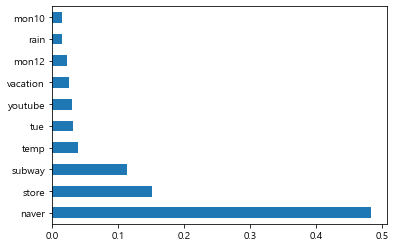

In [90]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')

 ## xgboost Regression

In [91]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators = 200, learning_rate=0.1,max_depth=3,random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 85.78817977561636
R_squared : 0.6355574152169426


In [93]:
score['xgb'] =  [metrics.mean_squared_error(y_test, y_pred), model.score(X_test, y_test)]
Data['xgb'] = y_pred 

<AxesSubplot:>

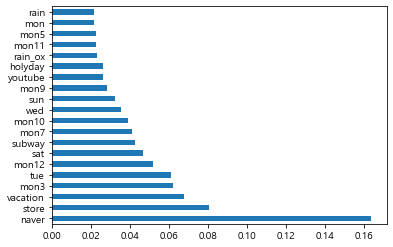

In [94]:
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')

## 비교

In [95]:
# 각 모델들의 MSE , R squre
score

{'linear': [105.47097898700119, 0.5519415809711871],
 'Ridge': [105.30544460131779, 0.55264479882179],
 'lasso': [105.60781887921202, 0.55264479882179],
 'K-NN': [104.5967320261438, 0.5556555287782969],
 'random_forest': [91.52979176470588, 0.6111660839216733],
 'Gradient_boosting': [88.94304819816408, 0.6221550047033844],
 'xgb': [85.78817977561636, 0.6355574152169426]}

In [118]:
# 이제부터는... R 로 갑니다.

In [96]:
# 시각화 하기위해 파일저장.
pred_DATA = pd.DataFrame(Data)
pred_DATA.to_csv('예측(2차).csv')

In [97]:
pred_DATA.head(10)

,y_test,linear,Ridge,lasso,K-NN,random_forest,Gradient_boosting,xgb
0,39,40.031124,40.031124,40.031124,40.888889,37.03,44.487731,45.283333
1,53,56.302476,56.302476,56.302476,52.444444,55.12,53.283235,57.256237
2,35,34.503529,34.503529,34.503529,33.444444,37.15,31.785316,31.000286
3,60,53.067710,53.067710,53.067710,51.222222,50.15,50.308572,51.177773
4,73,56.362357,56.362357,56.362357,61.222222,64.44,63.003624,62.742271
5,24,19.016582,19.016582,19.016582,28.111111,22.93,22.569545,22.220261
6,42,41.226520,41.226520,41.226520,39.000000,40.03,42.229793,39.810146
7,41,39.211487,39.211487,39.211487,37.000000,40.36,36.690511,37.610065
8,50,47.623186,47.623186,47.623186,49.444444,49.67,47.940334,50.044575
9,27,35.446599,35.446599,35.446599,36.222222,41.53,41.933801,40.837677


In [56]:
# 시각화는 따로 tableau 프로그램을 사용하였습니다.